Tutorial: Spectroelectrochemistry data
=============================

*Data required*: available for download [here](https://www.dropbox.com/sh/krmx08a6kah9250/AAAHlLHponILUIVesNJhureSa?dl=0)

This example data comes from Caiwu Liang, et al. Unravelling the effects of active site densities and
energetics on the water oxidation activity of iridium oxides https://doi.org/10.21203/rs.3.rs-2605628/v1

The data
------------
To run this tutorial, save the data somewhere on you computer and modify the `data_dir` variable below accordingly. The code in the following lines should then print a list of the data folder contents including several .csv's


In [1]:
from pathlib import Path

data_dir = Path.home() / "Dropbox/ixdat_resources/test_data/sec"

print("data directory containes files and folders:")
for path in data_dir.iterdir():
    print(path)

data directory containes files and folders:
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\decay
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_decay_export.csv
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_decay_export_reference.csv
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_decay_export_spectra.csv
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_export.csv
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_export_reference.csv
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_export_spectra.csv
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\test-2SEC.csv
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\test-2_JV.csv
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\test-7SEC.csv
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\test-7_JV.csv
C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\WL.csv


SEC while scanning potential
------------------------------------------

In [2]:
from ixdat import Measurement

sec = Measurement.read(
    data_dir / "test-7SEC.csv",
    path_to_ref_spec_file = data_dir / "WL.csv",
    path_to_U_J_file = data_dir / "test-7_JV.csv",
    scan_rate=1,
    tstamp=1,
    reader="msrh_sec"
)

importing ixdat v0.2.7.dev1 from C:\Users\Søren\git\ixdat\src\ixdat\__init__.py


C:\Users\Søren\git\ixdat\src\ixdat\techniques\analysis_tools.py:92: RuntimeWarning: invalid value encountered in divide
  v_scan_behind = (v - v_behind) / (t - t_behind)
C:\Users\Søren\git\ixdat\src\ixdat\techniques\analysis_tools.py:93: RuntimeWarning: invalid value encountered in divide
  v_scan_ahead = (v_ahead - v) / (t_ahead - t)


C:\Users\Søren\git\ixdat\src\ixdat\plotters\base_mpl_plotter.py:61: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes = [plt.subplot(gs[0:3, 0])]


[<Axes: xlabel='time from scan rate', ylabel='wavelength / [nm]'>,
 <Axes: xlabel='time / [s]', ylabel='raw potential / [V]'>,
 None,
 <Axes: ylabel='raw current / [mA]'>]

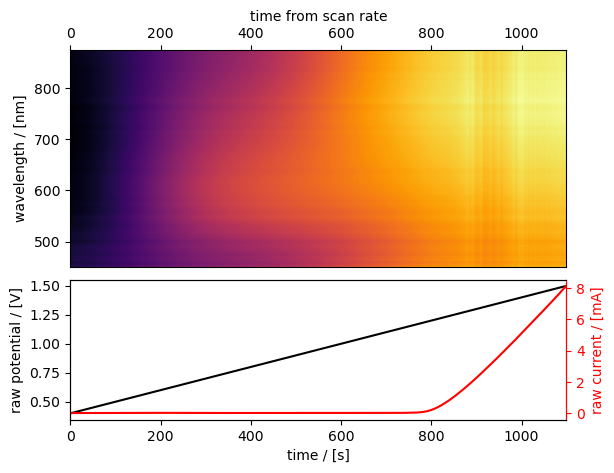

In [3]:
sec.plot_measurement()

The raw data as numpy arrays is accessible as such:

In [4]:
wavelength = sec.wavelength.data
absorption_matrix = sec.spectra.data
potential = sec.potential.data

print("wavelength:")
print(wavelength)

print("potential:")
print(potential)

print("absorption:")
print(absorption_matrix)


wavelength:
[450.58331 451.00531 451.42731 ... 873.6803  874.08472 874.48907]
potential:
[0.4   0.401 0.402 ... 1.497 1.498 1.499]
absorption:
[[ 5488.33333333  5501.93333333  5505.3        ... 37897.93333333
  37868.56666667 37805.83333333]
 [ 5483.          5502.46666667  5506.03333333 ... 37881.4
  37856.7        37809.46666667]
 [ 5490.76666667  5503.96666667  5512.33333333 ... 37871.8
  37863.53333333 37794.2       ]
 ...
 [ 3931.63333333  3948.23333333  3949.2        ... 24453.6
  24418.23333333 24395.86666667]
 [ 3927.7         3946.86666667  3950.8        ... 24414.76666667
  24387.76666667 24382.2       ]
 [ 3934.56666667  3939.53333333  3941.83333333 ... 24411.1
  24383.86666667 24374.16666667]]


C:\Users\Søren\git\ixdat\src\ixdat\plotters\plotting_tools.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(cmap_name)


[<Axes: xlabel='time from scan rate', ylabel='wavelength / [nm]'>,
 <Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 None,
 <Axes: ylabel='J / [mA cm$^{-2}$]'>]

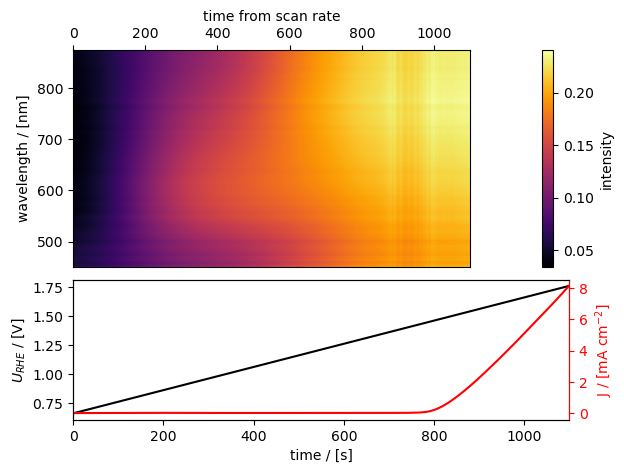

In [5]:
sec.calibrate_RE(RE_vs_RHE=0.26)
sec.normalize_current(A_el=1)
sec.plot_measurement(make_colorbar=True)

C:\Users\Søren\git\ixdat\src\ixdat\plotters\spectrum_plotter.py:192: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(cmap_name)


<Axes: xlabel='wavelength / [nm]', ylabel='$\\Delta$ O.D.'>

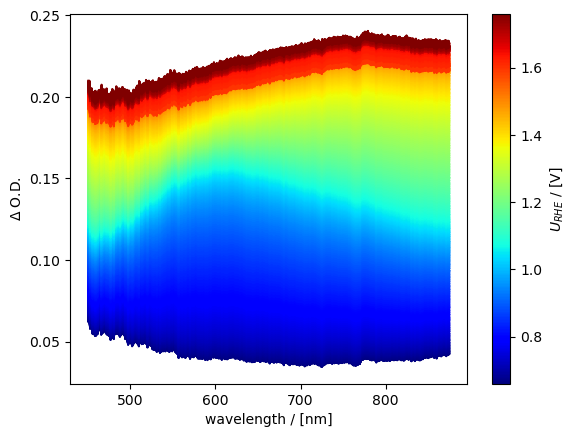

In [6]:
sec.plot_waterfall()

<Axes: xlabel='wavelength / [nm]', ylabel='reference'>

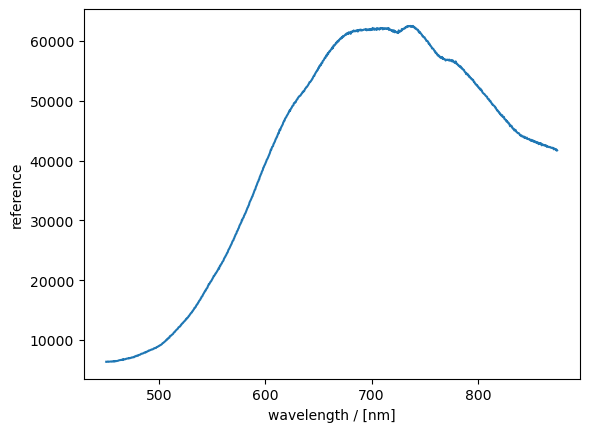

In [7]:
sec.reference_spectrum.plot()

<Axes: xlabel='wavelength / [nm]', ylabel='spectra_0.66V'>

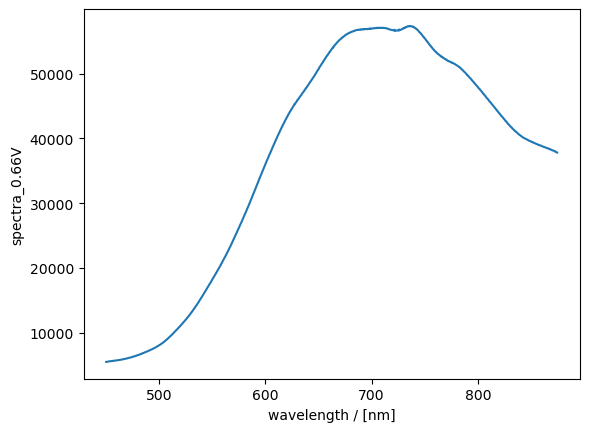

In [8]:
sec.set_reference_spectrum(V_ref=0.66)
sec.reference_spectrum.plot()

In [9]:
# help(sec)  # useful but very long output. Shows for example, that the following gives delta OD data:
delta_OD_data = sec.calc_dOD().data
print(delta_OD_data)  # A 2-D numpy array.

[[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 4.22234445e-04 -4.20965657e-05 -5.78463318e-05 ...  1.89506432e-04
   1.36113826e-04 -4.17359084e-05]
 [-1.92508176e-04 -1.60471285e-04 -5.54481744e-04 ...  2.99580384e-04
   5.77284638e-05  1.33658473e-04]
 ...
 [ 1.44867472e-01  1.44112513e-01  1.44271862e-01 ...  1.90272724e-01
   1.90564628e-01  1.90242564e-01]
 [ 1.45302172e-01  1.44262868e-01  1.44095945e-01 ...  1.90962949e-01
   1.91106836e-01  1.90485926e-01]
 [ 1.44543572e-01  1.45070544e-01  1.45082732e-01 ...  1.91028178e-01
   1.91176292e-01  1.90629039e-01]]


<Axes: xlabel='wavelength / [nm]', ylabel='$\\Delta$ O.D.'>

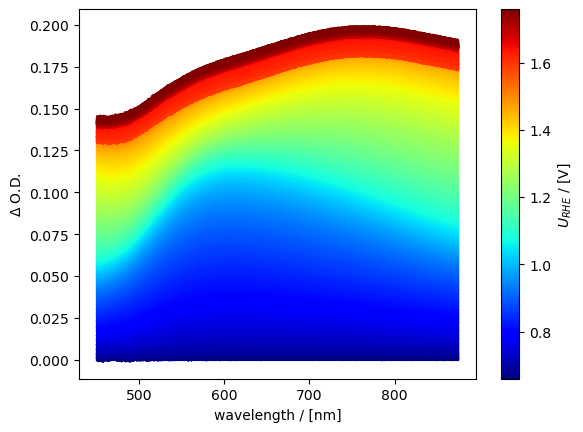

In [10]:
sec.plot_waterfall()

Text(0.5, 0, 'time / [s]')

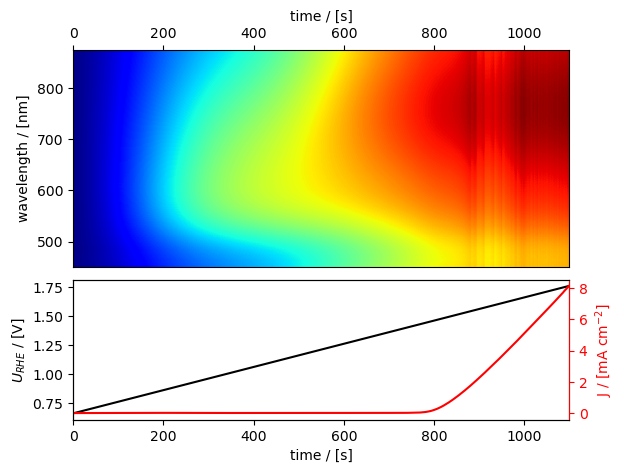

In [11]:
axes = sec.plot_measurement(cmap_name="jet")
axes[0].set_xlabel("time / [s]")

[<Axes: xlabel='$U_{RHE}$ / [V]', ylabel='wavelength / [nm]'>,
 <Axes: xlabel='$U_{RHE}$ / [V]', ylabel='J / [mA cm$^{-2}$]'>]

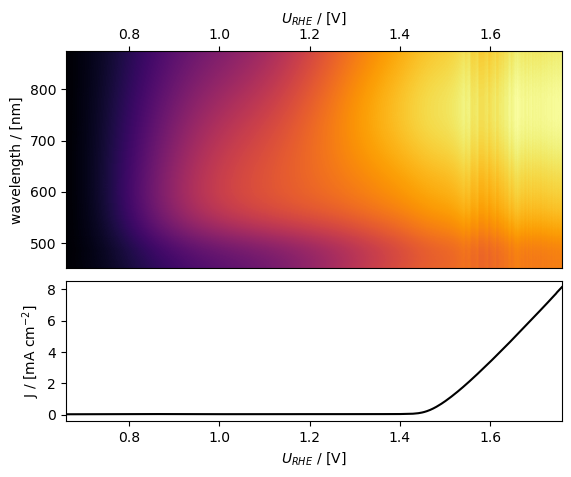

In [12]:
sec.plot_vs_potential()

(0.0, 0.1)

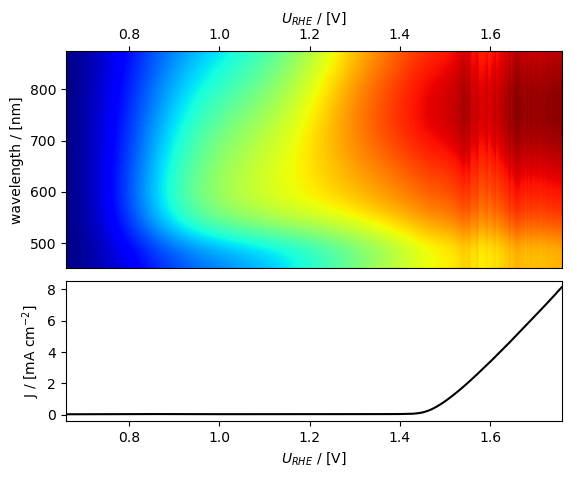

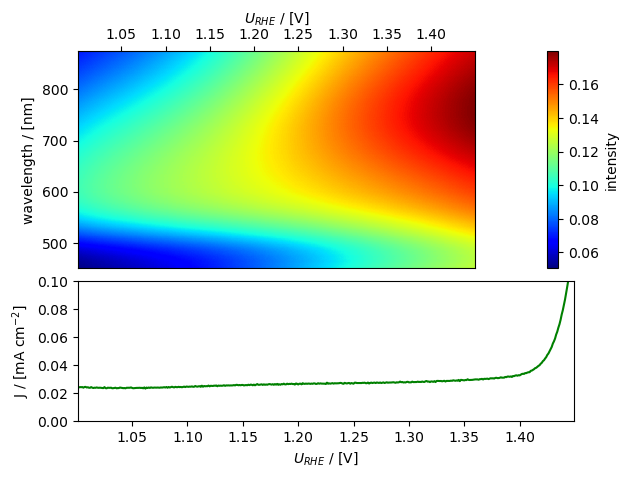

In [13]:
sec.plot_vs_potential(cmap_name="jet")

axes = sec.plot_vs_potential(cmap_name="jet", vspan=[1.0, 1.45], make_colorbar=True, color="g")
axes[1].set_ylim([0, 0.1])

C:\Users\Søren\git\ixdat\src\ixdat\plotters\sec_plotter.py:365: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(cmap_name)


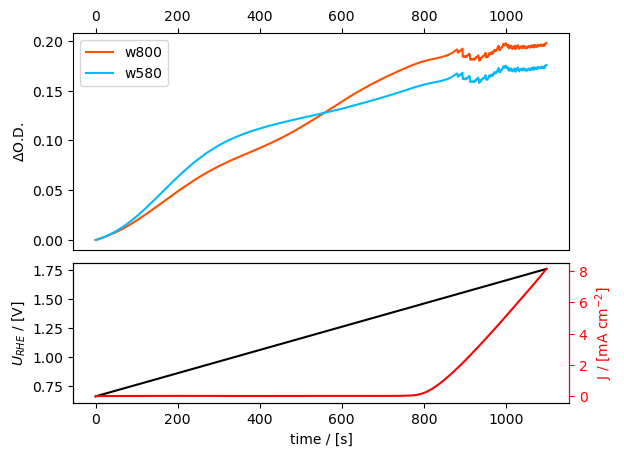

In [14]:
sec.plot_wavelengths(wavelengths=["w800", "w580"])

C:\Users\Søren\git\ixdat\src\ixdat\plotters\sec_plotter.py:412: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(cmap_name)


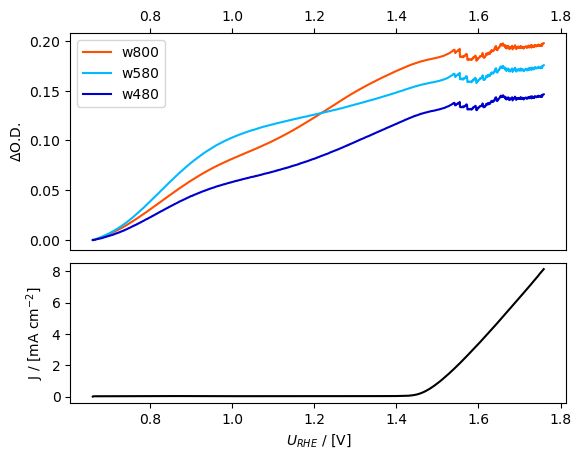

In [15]:
sec.plot_wavelengths_vs_potential(wavelengths=["w800", "w580", "w480"])

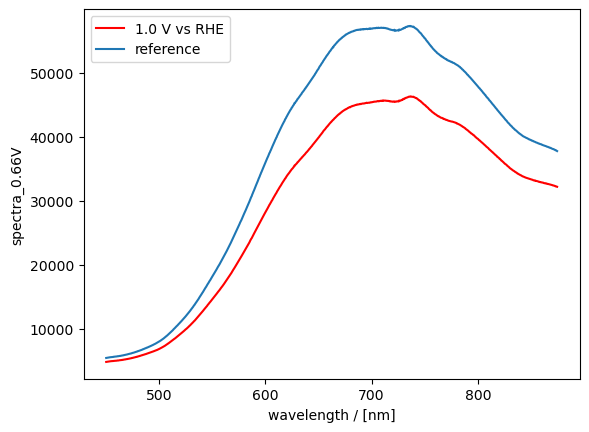

In [16]:
spec_1 = sec.get_spectrum(V=1.0)

ax = spec_1.plot(color="r", label="1.0 V vs RHE")
sec.reference_spectrum.plot(ax=ax, label="reference")
ax.legend()

<Axes: xlabel='wavelength / [nm]', ylabel='$\\Delta$ OD'>

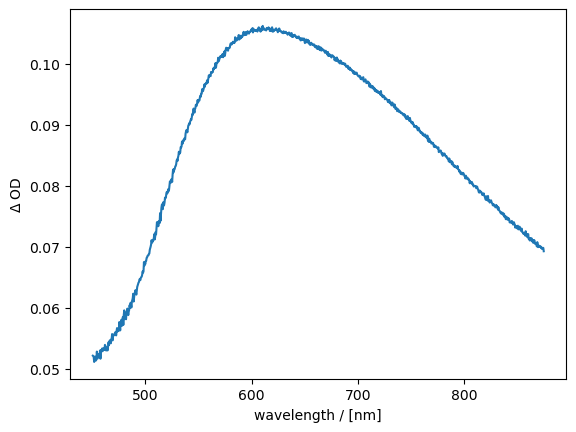

In [17]:
spec_1 = sec.get_dOD_spectrum(V=1.0, V_ref=0.66)
spec_1.plot()

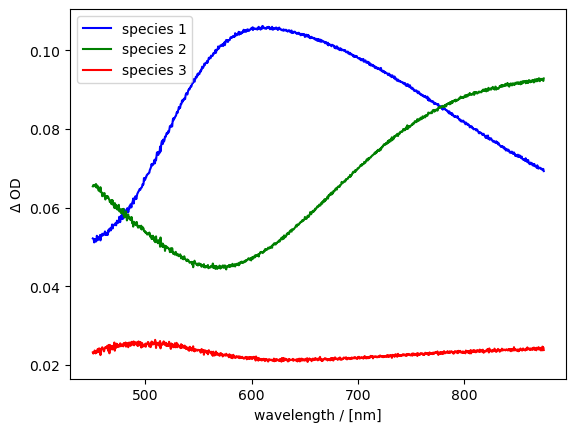

In [18]:
ax = sec.get_dOD_spectrum(V=1.0, V_ref=0.66).plot(color="b", label="species 1")
sec.get_dOD_spectrum(V=1.4, V_ref=1.0).plot(color="g", label="species 2", ax=ax)
sec.get_dOD_spectrum(V=1.7, V_ref=1.4).plot(color="r", label="species 3", ax=ax)
ax.legend()

In [19]:
sec.export(data_dir / "sec_export.csv")

print(sec.reference_spectrum.name)

wrote C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_export_spectra.csv!
wrote C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_export_reference.csv!
writing C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_export.csv!
spectra_0.66V


skipping the following line:
ixdat version = 0.2.7.dev1

skipping the following line:
backend_name = BackendBase(none, address=none)

skipping the following line:
backend_name = BackendBase(none, address=none)

skipping the following line:
backend_name = BackendBase(none, address=none)



C:\Users\Søren\git\ixdat\src\ixdat\plotters\base_mpl_plotter.py:61: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes = [plt.subplot(gs[0:3, 0])]


[<Axes: xlabel='$U_{RHE}$ / [V]', ylabel='wavelength / [nm]'>,
 <Axes: xlabel='$U_{RHE}$ / [V]', ylabel='J / [mA cm$^{-2}$]'>]

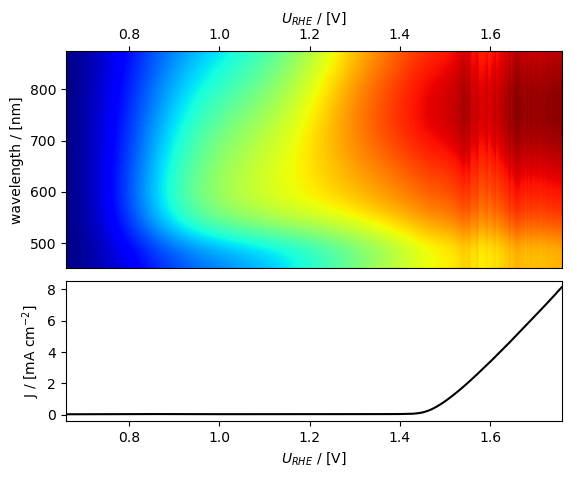

In [20]:


sec_reloaded = Measurement.read(data_dir / "sec_export.csv", reader="ixdat")

sec_reloaded.set_reference_spectrum(V_ref=0.66)

sec_reloaded.plot_vs_potential(cmap_name="jet")

In [21]:
[(s.name, s.shape) for s in sec_reloaded.series_list]



[('time from scan rate', (1100,)),
 ('$U_{RHE}$ / [V]', (1100,)),
 ('J / [mA cm$^{-2}$]', (1100,)),
 ('selector', (1100,)),
 ('w800', (1100,)),
 ('w580', (1100,)),
 ('w480', (1100,))]

Open-circuit potential decay
----------------------------------------

In [22]:
sec_decay = Measurement.read(
    data_dir / "decay/PDtest-1.35-1OSP-SP.csv",
    path_to_ref_spec_file=data_dir / "WL.csv",
    path_to_t_U_file=data_dir / "decay/PDtest-1.35-1OSP-E-t.csv",
    path_to_t_J_file=data_dir / "decay/PDtest-1.35-1OSP-J-t.csv",
    tstamp=1,
    reader="msrh_sec_decay",
)

C:\Users\Søren\git\ixdat\src\ixdat\plotters\base_mpl_plotter.py:61: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes = [plt.subplot(gs[0:3, 0])]


[<Axes: xlabel='t for spectra', ylabel='wavelength / [nm]'>,
 <Axes: xlabel='time / [s]', ylabel='raw potential / [V]'>,
 None,
 <Axes: ylabel='raw current / [mA]'>]

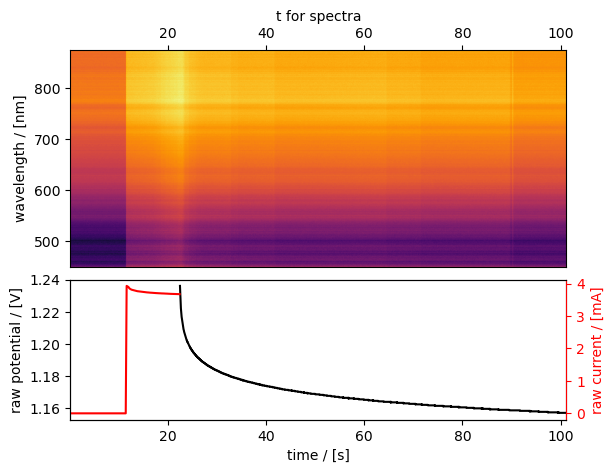

In [23]:
sec_decay.plot_measurement()

[<Axes: xlabel='t for spectra', ylabel='wavelength / [nm]'>,
 <Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 None,
 <Axes: ylabel='raw current / [mA]'>]

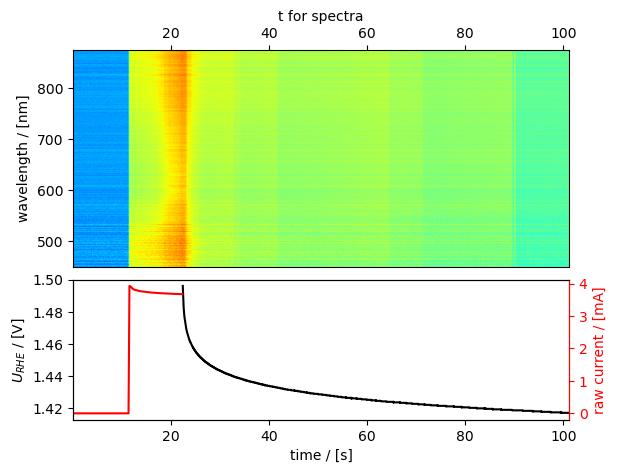

In [24]:
sec_decay.calibrate_RE(RE_vs_RHE=0.26)
sec_decay.set_reference_spectrum(t_ref=5)
sec_decay.plot_measurement(cmap_name="jet")

C:\Users\Søren\git\ixdat\src\ixdat\plotters\sec_plotter.py:365: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap(cmap_name)


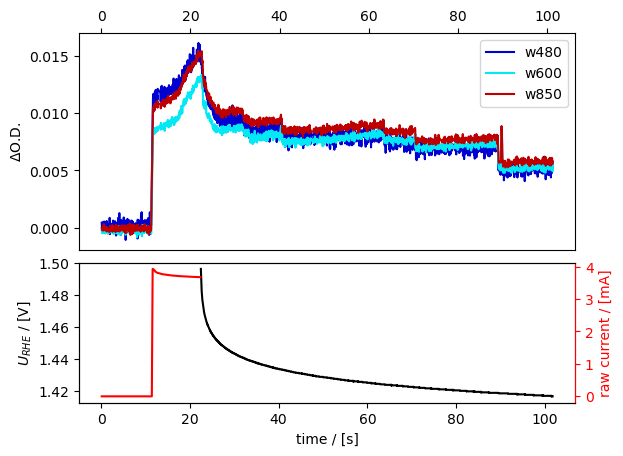

In [25]:
sec_decay.plot_wavelengths(wavelengths=["w480", "w600", "w850"])

In [26]:
sec_decay.export(data_dir / "sec_decay_export.csv")

wrote C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_decay_export_spectra.csv!
wrote C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_decay_export_reference.csv!
writing C:\Users\Søren\Dropbox\ixdat_resources\test_data\sec\sec_decay_export.csv!
